# LSTM

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [2]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Saving Kuantan1975-2017New.csv to Kuantan1975-2017New.csv


In [56]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


**With** **Normalization**

In [57]:
dataset = df.loc[:,'KUANTAN[mm]'].values
dataset = np.reshape(dataset,(-1,1))
print(dataset)
dataset.shape

[[  0.5]
 [131.3]
 [ 10.8]
 ...
 [ 49.4]
 [ 14.4]
 [ 61.4]]


(15695, 1)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[0.00094787]
 [0.24890995]
 [0.02047393]
 ...
 [0.09364929]
 [0.02729858]
 [0.1163981 ]]


In [59]:
#split into samples
from numpy import array

#14600/365 = 40
#sample = list(rain)

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(dataset)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(15695, 1)
(15330, 365, 1) (15330, 1)


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10731, 365, 1) (10731, 1)
(4599, 365, 1) (4599, 1)


In [61]:
#reshape 
series1 = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(10731, 365, 1)
(4599, 365, 1)


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import EarlyStopping

**batch size for series1 = 2, 4, 53, 94, 106, 188, 2491, 4982**

**batch size for series2 = 4271 is a prime number**

In [64]:
K.clear_session()
model = Sequential()
model.add(LSTM(16, input_shape=(365, 1)))
#model.add(LSTM(15))
#model.add(Dropout(0.1))
model.add(Dense(1))
#opt = keras.optimizers.Adam(learning_rate=1e-1000)
#opt = optimizers.adam(clipnorm=1.0)
#opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(series1, y_train, epochs=500, batch_size=200, validation_data=(series2, y_test),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 10731 samples, validate on 4599 samples
Epoch 1/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 2/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 6/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/500
10731/10731 [==============================] - 12s 1ms/step - loss: 0.0014 - val_loss: 0.00

**Make Predictions**

In [48]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(series1)
test_predict = model.predict(series2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [49]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0])))

Train Mean Absolute Error: 10.854363772520514
Train Root Mean Squared Error: 19.711975544638133
Test Mean Absolute Error: 10.834628840813716
Test Root Mean Squared Error: 20.92153926073285


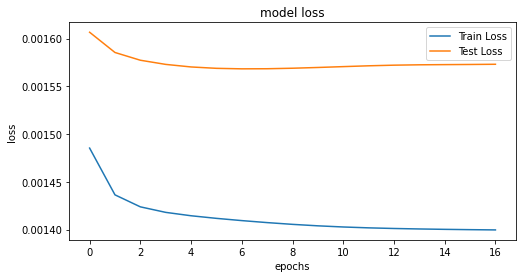

In [50]:
import matplotlib.pyplot as plt
#plot model loss

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

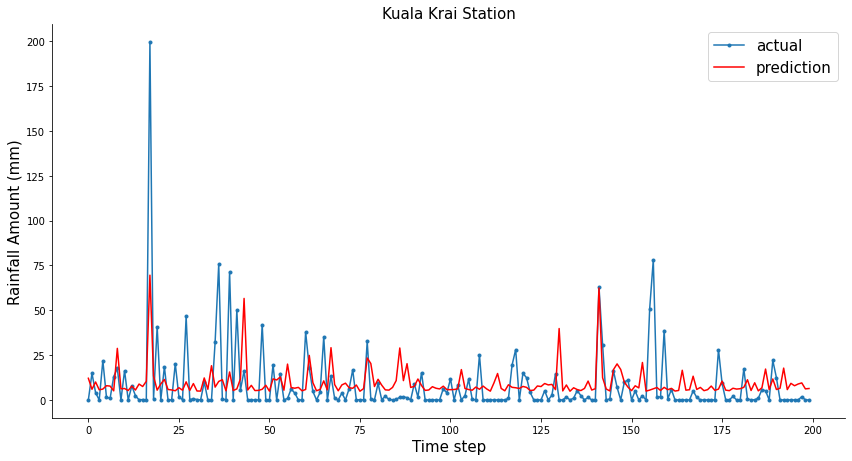

In [51]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Kuala Krai Station', size=15)
plt.ylabel('Rainfall Amount (mm)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

(4599, 1)
(4599, 1)


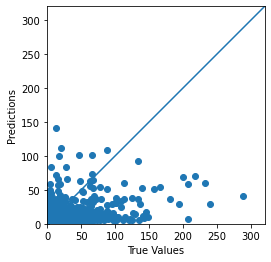

In [52]:
print(test_predict.shape)
print(y_test.shape)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 320]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [53]:
import scipy.stats as measures

per_coef = measures.pearsonr(y_test[:,0], test_predict[:,0])
#mse_coef = np.mean(np.square(np.array(y_pred) - np.array(y_true)))
print(per_coef)

(0.32345981511554095, 1.7460986261854386e-112)


In [54]:
per_coef1 = measures.pearsonr(y_train[:,0], train_predict[:,0])
print(per_coef1)

(0.3352444619156171, 3.9986122222896024e-280)


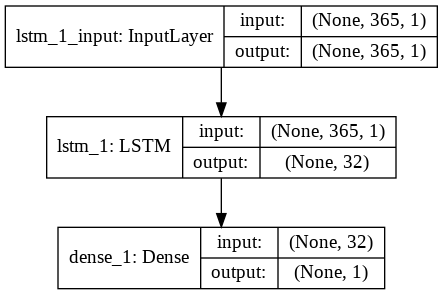

In [55]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [2]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Saving Kuantan1975-2017New.csv to Kuantan1975-2017New.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


**With** **Normalization**

In [4]:
dataset = df.loc[:,'KUANTAN[mm]'].values
dataset = np.reshape(dataset,(-1,1))
print(dataset)
dataset.shape

[[  0.5]
 [131.3]
 [ 10.8]
 ...
 [ 49.4]
 [ 14.4]
 [ 61.4]]


(15695, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[0.00094787]
 [0.24890995]
 [0.02047393]
 ...
 [0.09364929]
 [0.02729858]
 [0.1163981 ]]


In [6]:
#split into samples
from numpy import array

#14600/365 = 40
#sample = list(rain)

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(dataset)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(15695, 1)
(15330, 365, 1) (15330, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10731, 365, 1) (10731, 1)
(4599, 365, 1) (4599, 1)


In [8]:
#reshape 
series1 = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(10731, 365, 1)
(4599, 365, 1)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


**batch size for series1 = 2, 4, 53, 94, 106, 188, 2491, 4982**

**batch size for series2 = 4271 is a prime number**

In [11]:
K.clear_session()
model = Sequential()
model.add(LSTM(13, return_sequences=True, input_shape=(365, 1)))
model.add(LSTM(4))
#model.add(Dropout(0.1))
model.add(Dense(1))

#opt = keras.optimizers.Adam(learning_rate=1e-1000)
#opt = optimizers.adam(clipnorm=1.0)
#opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(series1, y_train, epochs=500, batch_size=100, validation_data=(series2, y_test),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 10731 samples, validate on 4599 samples
Epoch 1/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 3/500
10731/10731 [==============================] - 20s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 5/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/500
10731/10731 [==============================] - 19s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/500
10731/10731 [==============================] - 20s 2ms/step - loss: 0.0015 - val_loss: 0.00

**Make Predictions**

In [12]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(series1)
test_predict = model.predict(series2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [13]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0])))

Train Mean Absolute Error: 10.599729964331205
Train Root Mean Squared Error: 19.657653296891578
Test Mean Absolute Error: 10.631959719781282
Test Root Mean Squared Error: 20.94250764034597


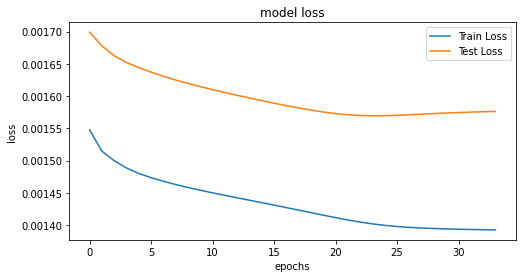

In [14]:
import matplotlib.pyplot as plt
#plot model loss

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

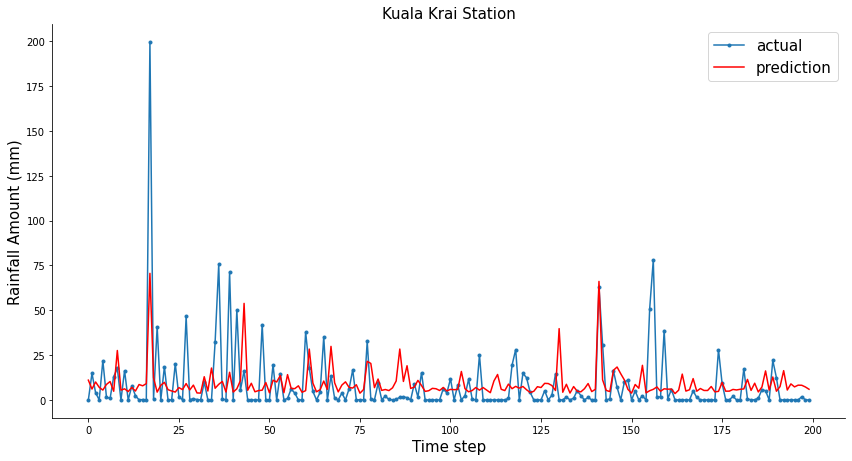

In [15]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Kuala Krai Station', size=15)
plt.ylabel('Rainfall Amount (mm)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

(4599, 1)
(4599, 1)


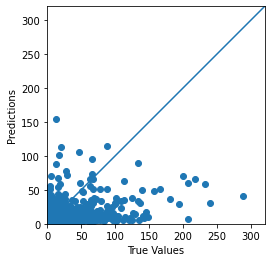

In [16]:
print(test_predict.shape)
print(y_test.shape)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 320]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [17]:
import scipy.stats as measures

per_coef = measures.pearsonr(y_test[:,0], test_predict[:,0])
#mse_coef = np.mean(np.square(np.array(y_pred) - np.array(y_true)))
print(per_coef)

(0.31981197406194206, 7.23860677153221e-110)


In [18]:
per_coef1 = measures.pearsonr(y_train[:,0], train_predict[:,0])
print(per_coef1)

(0.34026530310792535, 4.744384189368593e-289)


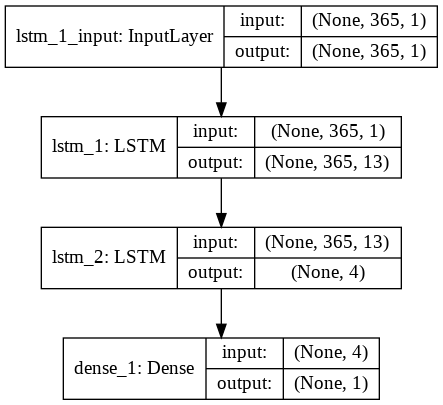

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)